# 📊 Netflix Data Analysis
This notebook explores and visualizes Netflix content data, including content types, ratings, durations, release trends, and top countries.

## 🔧 Import Libraries & Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\ABHISHEK SIDHAWAT\Desktop\pyhton_new\Matplotlib\Project\netflix_titles.csv')  # Update path if needed
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🧹 Data Cleaning

In [3]:
# Drop rows where important fields are missing
df.dropna(subset=['type', 'release_year', 'rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

## 📺 Distribution of Content Types

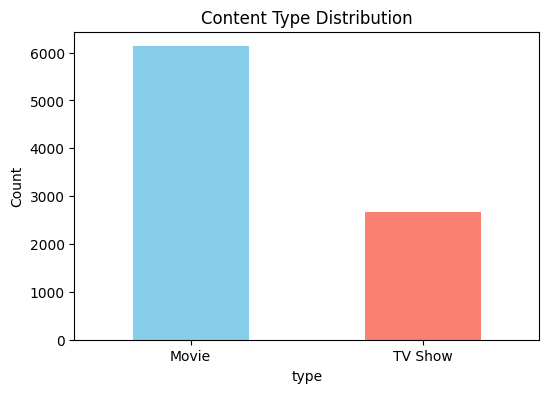

In [4]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Content Type Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## 🎬 Ratings Distribution

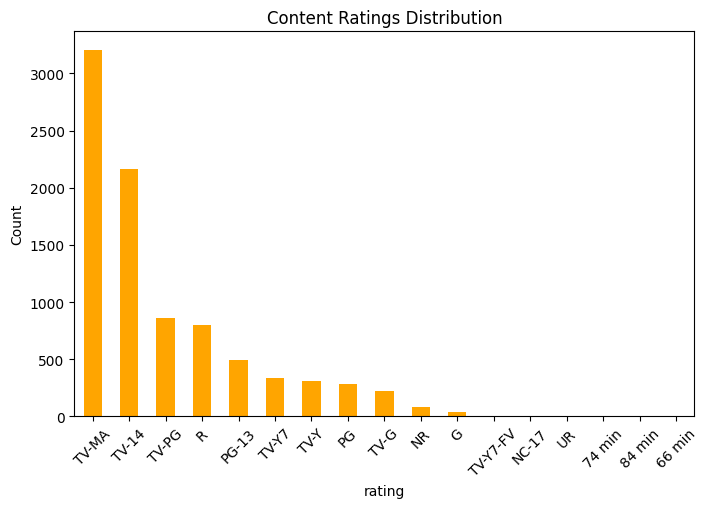

In [5]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='orange')
plt.title("Content Ratings Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## ⏱️ Movie Duration Distribution

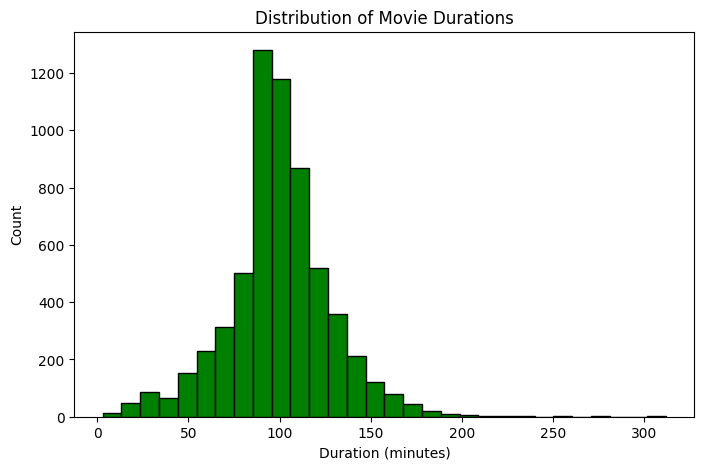

In [6]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(float)
plt.figure(figsize=(8, 5))
plt.hist(movie_df['duration'], bins=30, color='green', edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

## 📺 TV Show Season Distribution

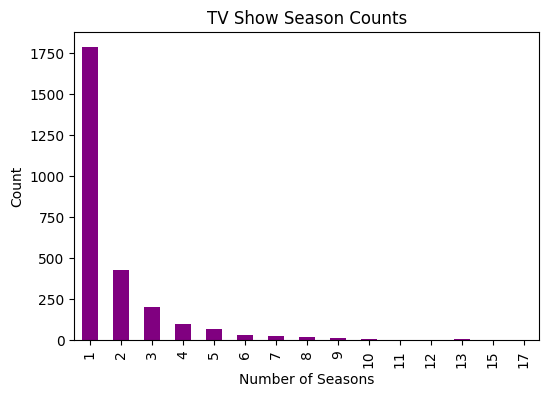

In [7]:
tv_show_df = df[df['type'] == 'TV Show'].copy()
tv_show_df['duration'] = tv_show_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
plt.figure(figsize=(6, 4))
tv_show_df['duration'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("TV Show Season Counts")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

## 📅 Content Released by Year

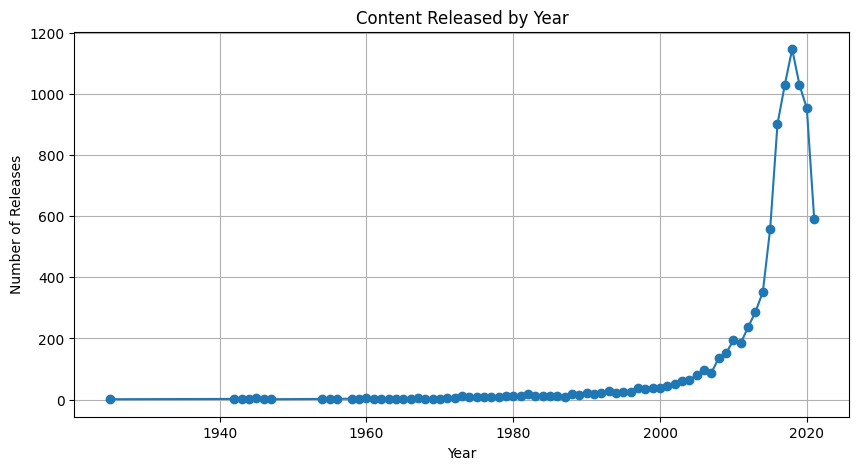

In [8]:
release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
release_year_counts.plot(kind='line', marker='o')
plt.title("Content Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

## 🌍 Top 10 Content-Producing Countries

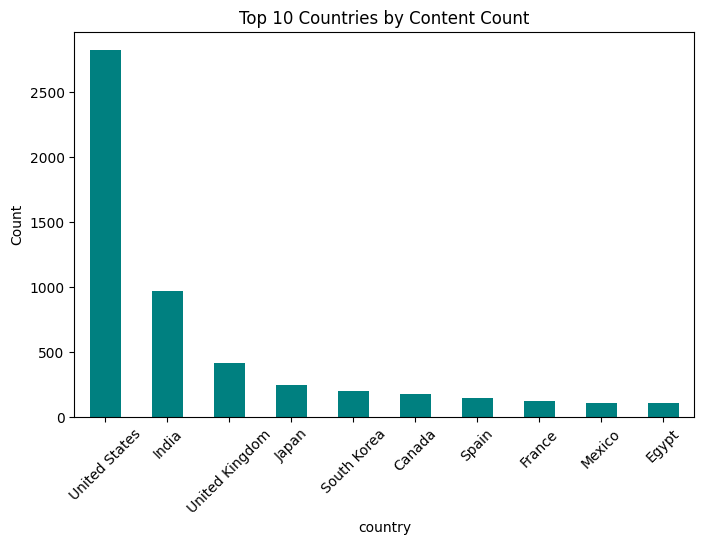

In [9]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='teal')
plt.title("Top 10 Countries by Content Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 📈 Content Types Over the Years

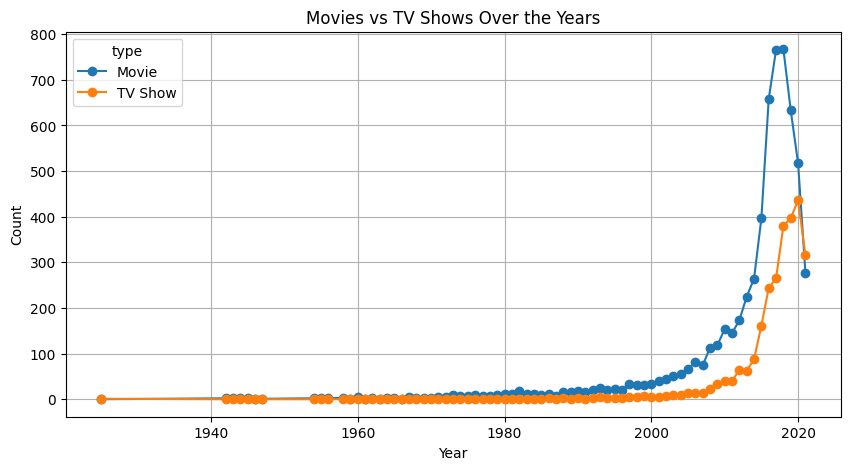

In [10]:
content_by_year = df.groupby('release_year')['type'].value_counts().unstack().fillna(0)
content_by_year.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()